In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# pd.set_option("display.max_rows",100)

In [3]:
df = pd.read_csv("startup_funding.csv")

In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df = df.drop("Sr No",axis=1)

In [6]:
# df.set_index("Sr No",inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
 8   Remarks            419 non-null    object
dtypes: object(9)
memory usage: 214.2+ KB


In [8]:
df.shape

(3044, 9)

In [9]:
df.describe()

,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
count,3044,3044,2873,2108,2864,3020,3040,2084,419
unique,1035,2459,821,1942,112,2412,55,471,72
top,02/02/2015,Ola Cabs,Consumer Internet,Online Lending Platform,Bangalore,Undisclosed Investors,Private Equity,"10,00,000",Series A
freq,11,8,941,11,700,39,1356,165,175


In [10]:
df.isnull().sum()

Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
 8   Remarks            419 non-null    object
dtypes: object(9)
memory usage: 214.2+ KB


In [12]:
df.columns = ['date', 'startup_name', 'industry_vertical', 'sub_vertical',
       'city', 'investors_name', 'investment_type', 'amount(USD)',
       'remarks']

In [13]:
df

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...
3039,29/01/2015,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,29/01/2015,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,30/01/2015,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,30/01/2015,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   date               3044 non-null   object
 1   startup_name       3044 non-null   object
 2   industry_vertical  2873 non-null   object
 3   sub_vertical       2108 non-null   object
 4   city               2864 non-null   object
 5   investors_name     3020 non-null   object
 6   investment_type    3040 non-null   object
 7   amount(USD)        2084 non-null   object
 8   remarks            419 non-null    object
dtypes: object(9)
memory usage: 214.2+ KB


In [15]:
# pd.to_datetime(df["date"])

In [16]:
df[df["date"] == "05/07/2018"]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks


In [17]:
df.iloc[192]["date"] = "05/07/2018"

In [18]:
df.iloc[192]

date                                                        05/07/2018
startup_name                                                  Loan Tap
industry_vertical                                    Consumer Internet
sub_vertical         Online Lending Platform For Salaried Professio...
city                                                            Mumbai
investors_name       Shunwei Capital, Tuscan Ventures, Ashish Goenk...
investment_type                                         Private Equity
amount(USD)                                                  62,50,000
remarks                                                            NaN
Name: 192, dtype: object

In [19]:
# pd.to_datetime(df["date"])
df[df["date"].apply(lambda x : True if x.count("/") <= 1 or x.count("/") > 2 else False)]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
2775,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN,NaN
2776,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,"20,00,000",NaN
2831,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,"5,00,000",NaN
3011,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,"6,50,000",NaN
3029,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"2,00,000",NaN


In [20]:
df["date"] = df["date"].str.replace(".","/").str.replace("//","/")

In [21]:
df[df["date"].str.contains("07/01/2015")]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
2999,07/01/2015,Faircent,NaN,NaN,NaN,"Devesh Sachdev, Ashish Tiwari",Seed Funding,NaN,Valuation at $4M
3000,07/01/2015,Nurturey,NaN,NaN,NaN,Seedrs Crowd funding platform,Crowd funding,"1,25,000",NaN
3001,07/01/2015,Bewakoof,NaN,NaN,NaN,"Rohit Bansal, Kunal Bahl, Nikhil Vora",Seed Funding,NaN,NaN
3002,07/01/2015,Stridalyzer,NaN,NaN,NaN,Kickstarter,Crowd Funding,"30,768",NaN
3003,07/01/2015,Commonfloor,NaN,NaN,NaN,Google Capital,Private Equity,"50,00,000",3rd Round


In [22]:
df["date"] = pd.to_datetime(df["date"],errors ="coerce")

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               3042 non-null   datetime64[ns]
 1   startup_name       3044 non-null   object        
 2   industry_vertical  2873 non-null   object        
 3   sub_vertical       2108 non-null   object        
 4   city               2864 non-null   object        
 5   investors_name     3020 non-null   object        
 6   investment_type    3040 non-null   object        
 7   amount(USD)        2084 non-null   object        
 8   remarks            419 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 214.2+ KB


In [24]:
df[df["date"].isnull()]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
2571,NaT,HandyHome,Hyperlocal Electronics repair Service,NaN,Mumbai,"Bessemer Ventures, Kae Capital",Seed Funding,"6,30,000",NaN
2606,NaT,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000",NaN


In [25]:
df.iloc[2571]["date"]

NaT

In [26]:
df["date"] = df["date"].astype("object")

In [27]:
df["date"][2571] = '2015-07-01'
df["date"][2606] = '2015-01-10'
# df["date"][3029] = '2015-01-22'

In [28]:
df.isnull().sum()

date                    0
startup_name            0
industry_vertical     171
sub_vertical          936
city                  180
investors_name         24
investment_type         4
amount(USD)           960
remarks              2625
dtype: int64

In [29]:
df["date"] = pd.to_datetime(df["date"])
# Date Done

In [30]:
df.isnull().sum()

date                    0
startup_name            0
industry_vertical     171
sub_vertical          936
city                  180
investors_name         24
investment_type         4
amount(USD)           960
remarks              2625
dtype: int64

In [31]:
df_copy = df.copy()

In [32]:
df_copy

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...
3039,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [33]:
df[["industry_vertical","sub_vertical","city"]]

,industry_vertical,sub_vertical,city
0,E-Tech,E-learning,Bengaluru
1,Transportation,App based shuttle service,Gurgaon
2,E-commerce,Retailer of baby and toddler products,Bengaluru
3,FinTech,Online Investment,New Delhi
4,Fashion and Apparel,Embroiled Clothes For Women,Mumbai
...,...,...,...
3039,NaN,NaN,NaN
3040,NaN,NaN,NaN
3041,NaN,NaN,NaN
3042,NaN,NaN,NaN


#### We can use in further data analysis. (Missing values in most used columns but we can use for finding total amount invest in  different investment type.)

In [34]:
df[df[["industry_vertical","sub_vertical","city"]].isnull().all(axis=1)]
# Data will be use to do some value count operation.

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
2873,2015-02-03,TrulyMadly.com,NaN,NaN,NaN,"Helion Venture Partners, Kae Capital",Private Equity,"55,00,000",Series A
2874,2015-02-03,InstaLively,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"1,20,000",NaN
2875,2015-03-03,Vserv,NaN,NaN,NaN,"Maverick Capital, IDG Ventures India",Private Equity,"1,50,00,000",NaN
2876,2015-03-03,Intruo.com,NaN,NaN,NaN,"Ashutosh Lawania, Alok Goel & others",Seed Funding,NaN,NaN
2877,2015-05-03,Niffler,NaN,NaN,NaN,SAIF Partners,Seed Funding,"10,00,000",NaN
...,...,...,...,...,...,...,...,...,...
3039,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [35]:
imp_df = df[df[["industry_vertical","sub_vertical","city","amount(USD)","remarks"]].isnull().all(axis=1)]

In [36]:
imp_df

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
2876,2015-03-03,Intruo.com,NaN,NaN,NaN,"Ashutosh Lawania, Alok Goel & others",Seed Funding,NaN,NaN
2887,2015-12-03,Process 9,NaN,NaN,NaN,"IAN Ventures, Alok Sharma, Kris Gopalakrishnan...",Seed Funding,NaN,NaN
2892,2015-03-13,Qyk,NaN,NaN,NaN,"Powai Lake Ventures, Zishan Hayath, Abhishek G...",Seed Funding,NaN,NaN
2895,2015-03-14,Routofy,NaN,NaN,NaN,"Kunal Bahl, Rohit Bansal",Seed Funding,NaN,NaN
2900,2015-03-17,GolfLAN,NaN,NaN,NaN,YourNest Angel Fund,Seed Funding,NaN,NaN
2910,2015-03-21,Round One,NaN,NaN,NaN,"HT Media, Arun Duggal",Seed Funding,NaN,NaN
2918,2015-03-25,Rozgar Mela,NaN,NaN,NaN,"Impact Investment Holding, Upaya Social Ventures",Seed Funding,NaN,NaN
2922,2015-03-26,ePoise,NaN,NaN,NaN,Undisclosed,Seed Funding,NaN,NaN
2946,2015-05-02,Kobster.com,NaN,NaN,NaN,Splice Advisors,Seed\\nFunding,NaN,NaN
2953,2015-09-02,CarDekho.com,NaN,NaN,NaN,Ratan Tata,Private Equity,NaN,NaN


In [37]:
df_copy = df_copy.drop(imp_df.index.to_list())

In [38]:
df_copy.isnull().sum()

date                    0
startup_name            0
industry_vertical     143
sub_vertical          908
city                  152
investors_name         24
investment_type         4
amount(USD)           932
remarks              2597
dtype: int64

#### Investment Type Preprocessing Start

In [39]:
df_copy["investment_type"].str.contains("Series")

0       False
1        True
2        True
3       False
4       False
        ...  
3039    False
3040    False
3041    False
3042    False
3043    False
Name: investment_type, Length: 3016, dtype: object

In [40]:
df_copy["investment_type"].unique()

array(['Private Equity Round', 'Series C', 'Series B', 'Pre-series A',
       'Seed Round', 'Series A', 'Series D', 'Seed', 'Series F',
       'Series E', 'Debt Funding', 'Series G', 'Series H', 'Venture',
       'Seed Funding', nan, 'Funding Round', 'Corporate Round',
       'Maiden Round', 'pre-series A', 'Seed Funding Round',
       'Single Venture', 'Venture Round', 'Pre-Series A', 'Angel',
       'Series J', 'Angel Round', 'pre-Series A',
       'Venture - Series Unknown', 'Bridge Round', 'Private Equity',
       'Debt and Preference capital', 'Inhouse Funding',
       'Seed/ Angel Funding', 'Debt', 'Pre Series A', 'Equity',
       'Debt-Funding', 'Mezzanine', 'Series B (Extension)',
       'Equity Based Funding', 'Private Funding', 'Seed / Angel Funding',
       'Seed/Angel Funding', 'Seed funding', 'Seed / Angle Funding',
       'Angel / Seed Funding', 'Private', 'Structured Debt', 'Term Loan',
       'PrivateEquity', 'Angel Funding', 'Seed\\\\nFunding',
       'Private\\\\nEqui

In [41]:
df_copy["investment_type"] = df_copy["investment_type"].str.upper()

In [42]:
df_copy["investment_type"].unique()

array(['PRIVATE EQUITY ROUND', 'SERIES C', 'SERIES B', 'PRE-SERIES A',
       'SEED ROUND', 'SERIES A', 'SERIES D', 'SEED', 'SERIES F',
       'SERIES E', 'DEBT FUNDING', 'SERIES G', 'SERIES H', 'VENTURE',
       'SEED FUNDING', nan, 'FUNDING ROUND', 'CORPORATE ROUND',
       'MAIDEN ROUND', 'SEED FUNDING ROUND', 'SINGLE VENTURE',
       'VENTURE ROUND', 'ANGEL', 'SERIES J', 'ANGEL ROUND',
       'VENTURE - SERIES UNKNOWN', 'BRIDGE ROUND', 'PRIVATE EQUITY',
       'DEBT AND PREFERENCE CAPITAL', 'INHOUSE FUNDING',
       'SEED/ ANGEL FUNDING', 'DEBT', 'PRE SERIES A', 'EQUITY',
       'DEBT-FUNDING', 'MEZZANINE', 'SERIES B (EXTENSION)',
       'EQUITY BASED FUNDING', 'PRIVATE FUNDING', 'SEED / ANGEL FUNDING',
       'SEED/ANGEL FUNDING', 'SEED / ANGLE FUNDING',
       'ANGEL / SEED FUNDING', 'PRIVATE', 'STRUCTURED DEBT', 'TERM LOAN',
       'PRIVATEEQUITY', 'ANGEL FUNDING', 'SEED\\\\NFUNDING',
       'PRIVATE\\\\NEQUITY', 'CROWD FUNDING'], dtype=object)

In [43]:
remove_lst1 = ["SEED","SEED ROUND", "SEED FUNDING ROUND", "SEED\\\\NFUNDING"] # SEED FUNDING
remove_lst2 = ["PRIVATE EQUITY ROUND", "PRIVATE", "PRIVATEEQUITY", "PRIVATE\\\\NEQUITY","PROVATE FUNDING"] # PRIVATE FUNDING
remove_lst3 = ["SEED/ ANGEL FUNDING", "SEED / ANGEL FUNDING", "SEED/ANGEL FUNDING","SEED / ANGLE FUNDING"] # SEED / ANGEL FUNDING
remove_lst4 = ["ANGEL","ANGEL ROUND"] # ANGEL FUNDING
remove_lst5 = ["EQUITY"] # EQUTIY FUNDING
remove_lst6 = ["VENTURE - SERIES UNKNOWN"] # VENTURE

In [44]:
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "SEED FUNDING" if x in remove_lst1 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "PRIVATE FUNDING" if x in remove_lst2 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "SEED / ANGEL FUNDING" if x in remove_lst3 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "ANGEL FUNDING" if x in remove_lst4 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "EQUITY FUNDING" if x in remove_lst5 else x)
df_copy["investment_type"] = df_copy["investment_type"].apply(lambda x: "VENTURE" if x in remove_lst6 else x)

In [45]:
df_copy["investment_type"].unique()

array(['PRIVATE FUNDING', 'SERIES C', 'SERIES B', 'PRE-SERIES A',
       'SEED FUNDING', 'SERIES A', 'SERIES D', 'SERIES F', 'SERIES E',
       'DEBT FUNDING', 'SERIES G', 'SERIES H', 'VENTURE', nan,
       'FUNDING ROUND', 'CORPORATE ROUND', 'MAIDEN ROUND',
       'SINGLE VENTURE', 'VENTURE ROUND', 'ANGEL FUNDING', 'SERIES J',
       'BRIDGE ROUND', 'PRIVATE EQUITY', 'DEBT AND PREFERENCE CAPITAL',
       'INHOUSE FUNDING', 'SEED / ANGEL FUNDING', 'DEBT', 'PRE SERIES A',
       'EQUITY FUNDING', 'DEBT-FUNDING', 'MEZZANINE',
       'SERIES B (EXTENSION)', 'EQUITY BASED FUNDING',
       'ANGEL / SEED FUNDING', 'STRUCTURED DEBT', 'TERM LOAN',
       'CROWD FUNDING'], dtype=object)

In [46]:
df_copy["investment_type"] = df_copy["investment_type"].str.title()

In [47]:
df_copy["investment_type"].unique()

array(['Private Funding', 'Series C', 'Series B', 'Pre-Series A',
       'Seed Funding', 'Series A', 'Series D', 'Series F', 'Series E',
       'Debt Funding', 'Series G', 'Series H', 'Venture', nan,
       'Funding Round', 'Corporate Round', 'Maiden Round',
       'Single Venture', 'Venture Round', 'Angel Funding', 'Series J',
       'Bridge Round', 'Private Equity', 'Debt And Preference Capital',
       'Inhouse Funding', 'Seed / Angel Funding', 'Debt', 'Pre Series A',
       'Equity Funding', 'Debt-Funding', 'Mezzanine',
       'Series B (Extension)', 'Equity Based Funding',
       'Angel / Seed Funding', 'Structured Debt', 'Term Loan',
       'Crowd Funding'], dtype=object)

In [48]:
df_copy

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Funding,"20,00,00,000",NaN
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,"30,00,000",NaN
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000",NaN
...,...,...,...,...,...,...,...,...,...
3039,2015-01-29,Printvenue,NaN,NaN,NaN,Asia Pacific Internet Group,Private Equity,"45,00,000",NaN
3040,2015-01-29,Graphene,NaN,NaN,NaN,KARSEMVEN Fund,Private Equity,"8,25,000",Govt backed VC Fund
3041,2015-01-30,Mad Street Den,NaN,NaN,NaN,"Exfinity Fund, GrowX Ventures.",Private Equity,"15,00,000",NaN
3042,2015-01-30,Simplotel,NaN,NaN,NaN,MakeMyTrip,Private Equity,NaN,"Strategic Funding, Minority stake"


In [49]:
def clean_my_column(column_name):
    special_char = ["\\\\xe2\\\\x80\\\\x99s","\\\\xe2\\\\x80\\\\x99","\\\\xc2\\\\xa0","\\\\xc3\\\\x98","\\xe2\\x80\\x93","\\\\n","\\\\xc3\\\\xa"]
    special_char2 = "\\\\xc3\\\\xa9"
    
    for char in special_char:
        # df_copy[column_name] = df_copy[column_name].replace(char,"")
        df_copy[column_name] = df_copy[column_name].apply(lambda x : str(x).replace(char,""))
    
    df_copy[column_name] = df_copy[column_name].apply(lambda x : str(x).replace(special_char2,""))
    
    # df_copy[column_name] = df_copy[column_name].replace(special_char2,"e")
    df_copy[column_name] = df_copy[column_name].str.strip()
    df_copy[column_name] = df_copy[column_name].replace("nan",np.nan)

#### Startup Name Preprocessing

In [120]:
first = ["https://www.wealthbucket.in/",'"BYJU\\\\\'S"',".com",".io",".in"]
second = ["wealthbucket","BYJU'S","","",""]

In [121]:
for i in range(len(first)):
    df_copy["startup_name"] = df_copy["startup_name"].apply(lambda x : x.replace(first[i],second[i]))

In [119]:
clean_my_column("startup_name")

In [53]:
# df_copy.iloc[3][1]

In [54]:
# df_copy.iloc[2495][1]

In [55]:
# df_copy.loc[2504][1]

In [56]:
# df_copy.iloc[67][1]

In [57]:
# df_copy.iloc[2013][1]

In [58]:
# df_copy.loc[2720][1]

In [59]:
# df_copy.loc[2954][1]

In [60]:
# df_copy.loc[1394][1]

In [61]:
# df_copy.loc[2606]

#### City Preprocessing

In [62]:
df_copy["city"] = df_copy["city"].str.replace("Bengaluru","Bangalore")

In [63]:
clean_my_column("city")

In [64]:
df_copy[df_copy["startup_name"] == "CarDekho"]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
8,2019-06-12,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
44,2019-01-08,CarDekho,E-Commerce,Automotive,Gurgaon,SC GG India Mobility Holdings LLC,Series C,"2,00,00,000",NaN
116,2019-03-01,CarDekho,Automobile,Online Marketplace,Jaipur,"Sequoia India, Hillhouse Capital, Alphabet\\xe...",Series C,"11,00,00,000",NaN
2795,2015-05-22,CarDekho,Online Car Portal,NaN,Jaipur,HDFC Bank,Private Equity,NaN,1% stake


In [65]:
df_copy[df_copy.duplicated(subset=["startup_name"])]

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD),remarks
21,2019-11-18,Healthians,Health and Wellness,Healthcare services,Gurgaon,"DG Daiwa Ventures, DG Incubation",Series B,"1,20,00,000",NaN
44,2019-01-08,CarDekho,E-Commerce,Automotive,Gurgaon,SC GG India Mobility Holdings LLC,Series C,"2,00,00,000",NaN
65,2019-01-07,Uniphore,Artificial Intelligence,Speech Recognition,Taramani,March Capital Partners,Series C,"3,80,80,000",NaN
97,2019-05-31,Bira91,Food and Beverage,Brewery,New Delhi,Sixth Sense Ventures,Series B,"56,00,000",NaN
110,2019-04-17,Shuttl,Transportation,Bus Aggregation,Gurugram,New Atlantic Ventures,Venture Round,"50,00,000",NaN
...,...,...,...,...,...,...,...,...,...
3025,2015-01-21,Simplilearn,NaN,NaN,NaN,"Mayfield India, Kalaari Capital, Helion Ventures",Private Equity,"1,47,50,000",NaN
3026,2015-01-21,MyDreamStore,NaN,NaN,NaN,Undisclosed Investors,Seed Funding,"3,25,000",NaN
3028,2015-05-21,Villgro,NaN,NaN,NaN,Michael & Susan Dell Foundation,Seed Funding,"32,50,000",To fund edu startups
3034,2015-01-24,Aasaanjobs,NaN,NaN,NaN,"Inventus Capital Partners, IDG Ventures",Seed Funding,"15,00,000",NaN


In [66]:
df_copy.isna().sum()

date                    0
startup_name            0
industry_vertical     143
sub_vertical          908
city                  152
investors_name         24
investment_type         4
amount(USD)           932
remarks              2597
dtype: int64

In [67]:
df_copy = df_copy.drop(columns="remarks")

#### Amount USD Preprocessing

In [68]:
df_copy.head()

,date,startup_name,industry_vertical,sub_vertical,city,investors_name,investment_type,amount(USD)
0,2020-09-01,BYJU’S,E-Tech,E-learning,Bangalore,Tiger Global Management,Private Funding,"20,00,00,000"
1,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bangalore,Sequoia Capital India,Series B,"1,83,58,860"
3,2020-02-01,wealthbucket,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-Series A,"30,00,000"
4,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Funding,"18,00,000"


In [69]:
df_copy["amount(USD)"] = pd.to_numeric(df_copy["amount(USD)"].str.replace(",",""),errors="coerce")

In [70]:
df_copy["amount(USD)"] = df_copy["amount(USD)"].fillna(df_copy["amount(USD)"].mean())

In [71]:
df_copy["amount(USD)"] = (df_copy["amount(USD)"] * 83.25) / 10000000

In [72]:
df_copy.rename(columns={"amount(USD)":"amount_cr"},inplace= True)

#### Industry Vertical Preprocessing

In [73]:
df_copy["industry_vertical"] = df_copy["industry_vertical"].apply(lambda x : str(x).replace("ecommerce","E-commerce").replace("eCommerce","E-commerce").replace("ECommerce","E-Commerce").replace("E-commerce","E-Commerce"))

In [74]:
clean_my_column("industry_vertical")

#### Sub Vertical Preprocessing

In [75]:
clean_my_column("sub_vertical")

#### Investor Name Preprocessing

In [76]:
df_copy["investors_name"].fillna("Unknown",inplace=True)

In [77]:
df_copy["investors_name"] = df_copy["investors_name"].apply(lambda x : x.replace("Softbank","Softbank Group").replace("SoftBank Group","Softbank Group").replace('"Kedaraa Capital, Ontario Teachers\\\\\'"',"Kedaraa Capital, Ontario Teachers"))

In [78]:
clean_my_column("investors_name")

In [159]:
# Year wise Highest invested in industry_vertical

years = new_df["year"]
name_lst,investor_lst,amount_lst,year_lst = [],[],[],[]
for year in years:
    data = df_copy[df_copy["year"] == year].sort_values(by="amount_cr",ascending=False).iloc[0]
    year_lst.append(data["year"])
    name_lst.append(data["startup_name"])
    investor_lst.append(data["investors_name"])
    amount_lst.append(data["amount_cr"])

new_df = pd.DataFrame({"year":year_lst,"startup_name":name_lst,"investors_name":investor_lst,"amount_cr":amount_lst})
new_df

,year,startup_name,investors_name,amount_cr
0,2015,Flipkart,Steadview Capital and existing investors,5827.5
1,2016,Snapdeal,Ontario Teachers Pension Plan & Others,1665.0
2,2017,Flipkart,Softbank Group,20812.5
3,2018,True North,Unknown,4995.0
4,2019,Rapido Bike Taxi,Westbridge Capital,32467.5
5,2020,BYJU’S,Tiger Global Management,1665.0


#### Visualization Starts

In [79]:
sns.set(style="darkgrid")

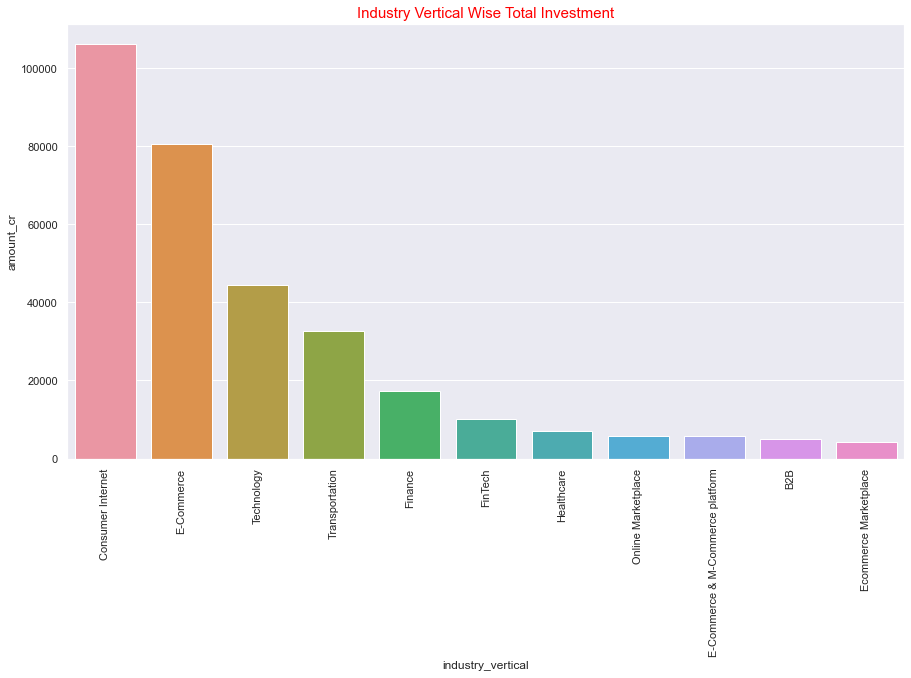

In [80]:
bar_df = df_copy.groupby("industry_vertical")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="industry_vertical",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("Industry Vertical Wise Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# Consumer Internet has the highest investment of more than 1 lac Cr and on second E-Commerce sector has 80k Cr and on third technology sector has total investment of 42k Cr.

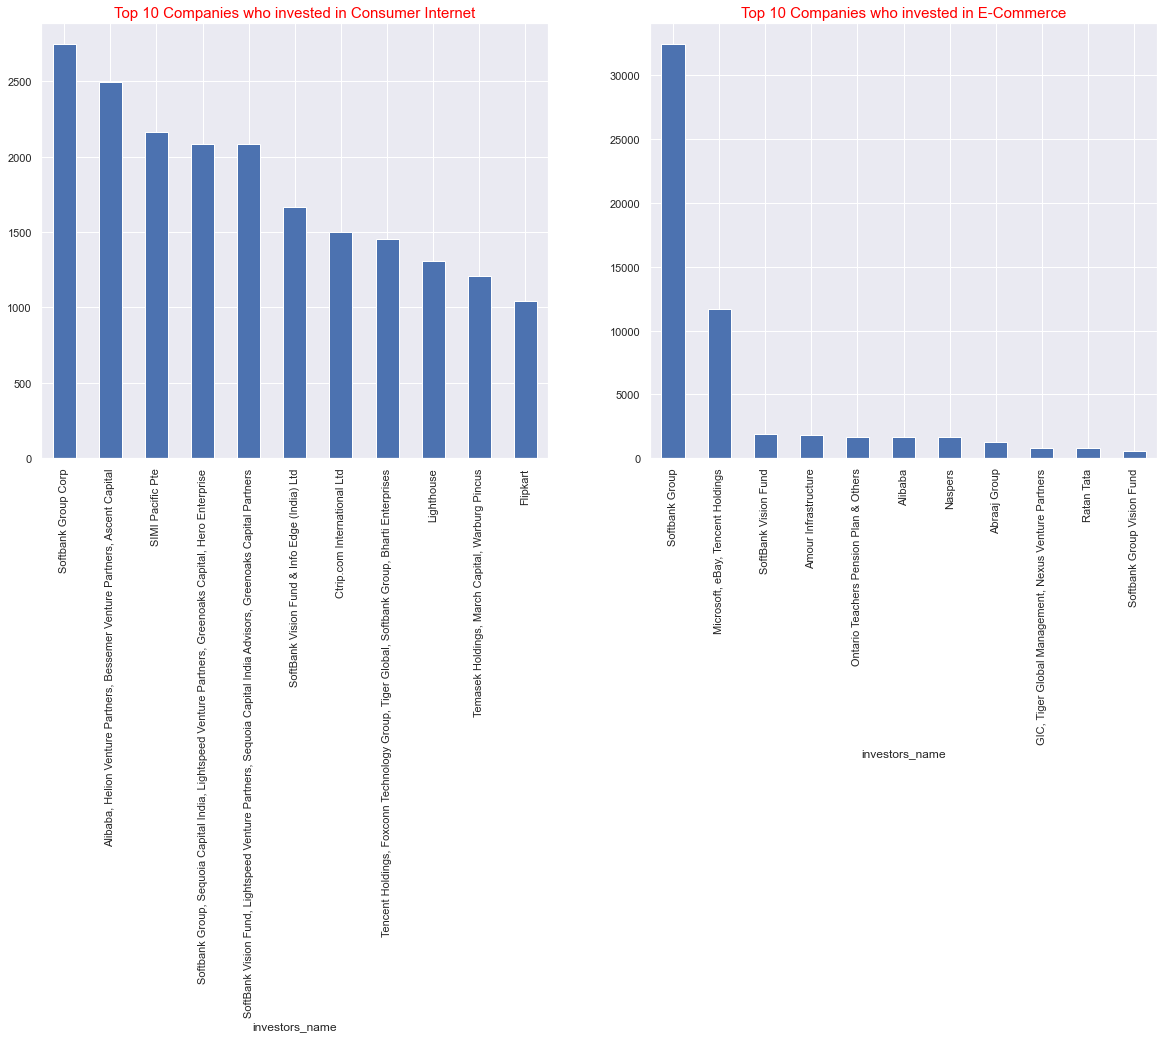

In [81]:
# Which investors have invested howmuch money in the consumer internet :
fig,axes = plt.subplots(1,2,figsize=(20,8))
industry_lst = ["Consumer Internet","E-Commerce"]

for i in range(len(industry_lst)):
    grp1 = df_copy[df_copy["industry_vertical"] == industry_lst[i]].groupby("investors_name")["amount_cr"].sum().sort_values(ascending=False)[:11]
    grp1.plot(kind="bar",ax=axes[i])
    axes[i].set_title(f"Top 10 Companies who invested in {industry_lst[i]}",fontdict={"fontsize":15,"color":"red"})
    plt.tight_layout()

# Summary :
# Softbank Group is the company who invested in the both Consumer Internet with more than 2500 Cr and E-Commerce industry with more than 30000 Cr investment.

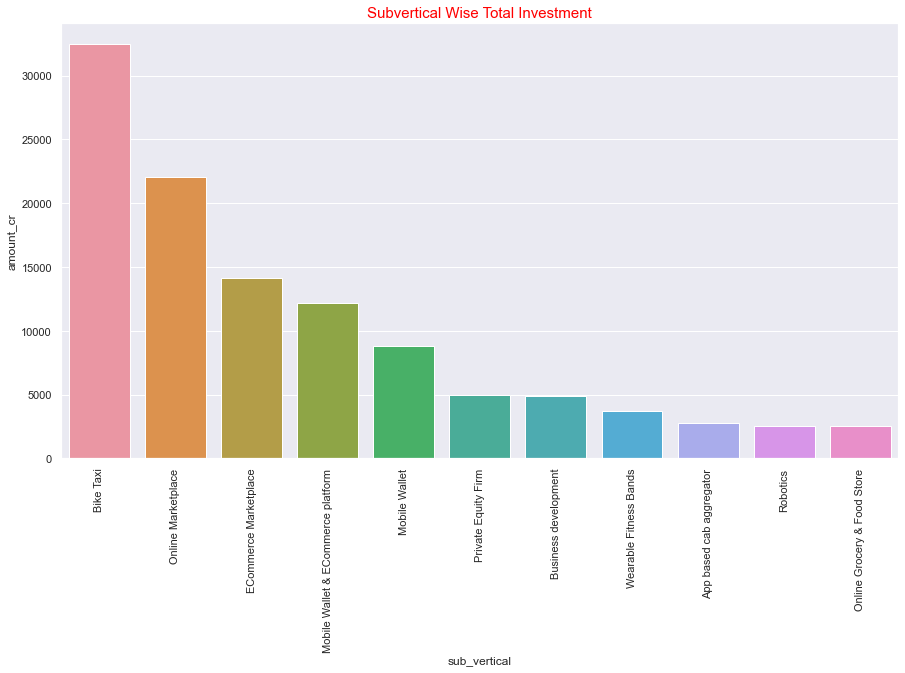

In [82]:
bar_df = df_copy.groupby("sub_vertical")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="sub_vertical",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("Subvertical Wise Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# Bike Taxi is on the top with 30000 Cr investment.

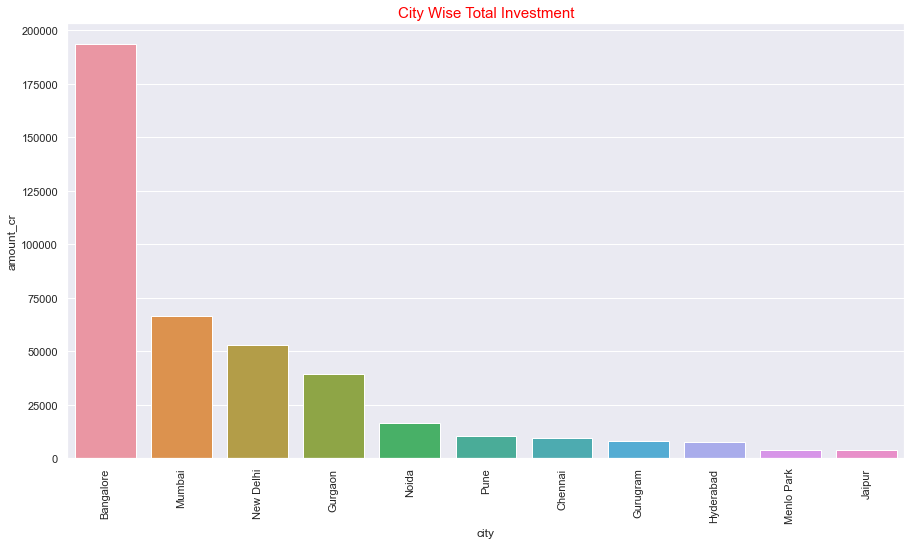

In [83]:
bar_df = df_copy.groupby("city")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="city",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("City Wise Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# Bangalore city has the investment of 18000 Cr and mumbai comes on second place with 73000 Cr.

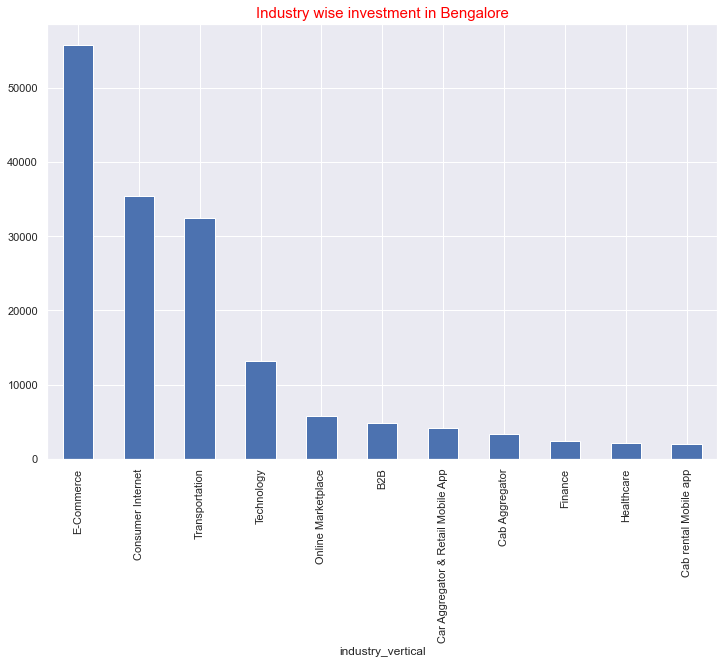

In [84]:
plt.figure(figsize=(12,8))
df_copy[df_copy["city"] == "Bangalore"].groupby("industry_vertical").sum()["amount_cr"].sort_values(ascending=False)[:11].plot(kind="bar")
plt.title("Industry wise investment in Bengalore",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary :
# In bengalore most of the investment are done in E-Commerce sector then Consumer internet and then transportation.

In [85]:
# bar_data = df_copy.groupby(["industry_vertical","sub_vertical"],as_index=False)["amount_cr"].sum().sort_values(by="amount_cr",ascending=False)[:13]
# plt.figure(figsize=(15,10))
# sns.barplot(x="sub_vertical",y="amount_cr",hue="industry_vertical",data=bar_data)

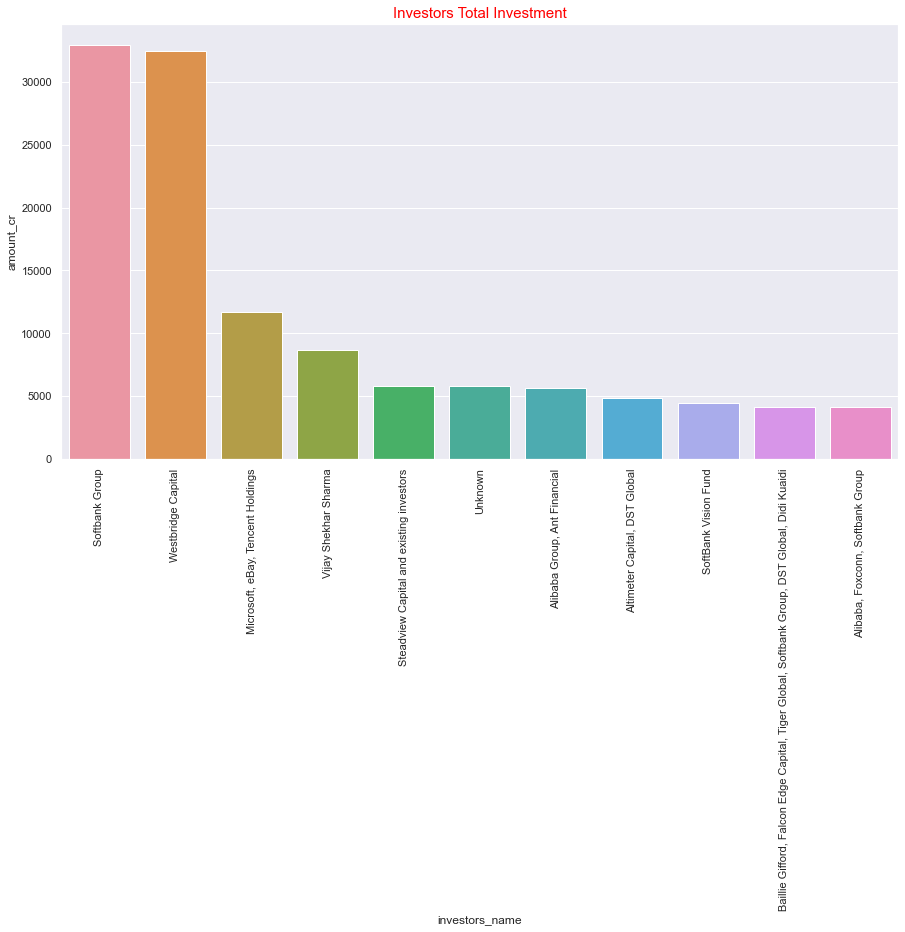

In [86]:
bar_df = df_copy.groupby("investors_name")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="investors_name",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("Investors Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# Softbank Group has invested more than 34000 Cr and Westbridge Capital has invested slightly less than Softbank Group near to 33000 Cr.

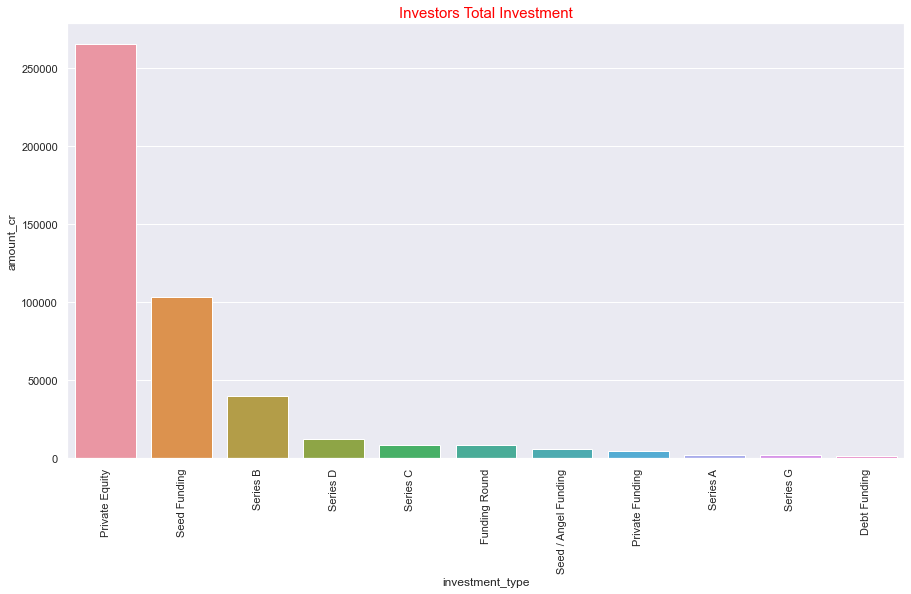

In [87]:
bar_df = df_copy.groupby("investment_type")["amount_cr"].sum().sort_values(ascending=False).to_frame().reset_index()

plt.figure(figsize=(15,8))
sns.barplot(x="investment_type",y="amount_cr",data=bar_df.iloc[:11])
plt.xticks(rotation=90)
plt.title("Investors Total Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary : 
# More than 2.5 lac Cr investment are done in private equity of company.

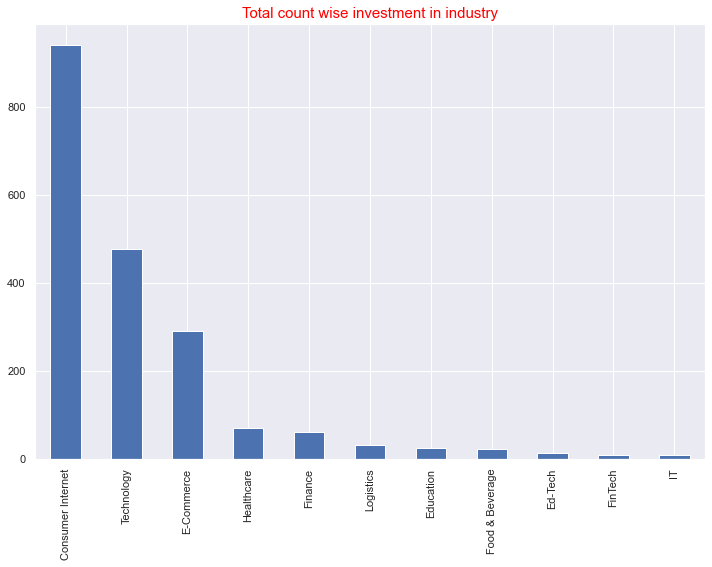

In [88]:
# Most investment in which industry_vertical :
plt.figure(figsize=(12,8))
df_copy["industry_vertical"].value_counts().sort_values(ascending=False)[:11].plot(kind="bar")
plt.title("Total count wise investment in industry",fontdict={"fontsize":15,"color":"red"})
plt.show()

# sns.countplot(x="industry_vertical",data=df_copy)
# Summary : 
# Most of the people invested money in consumer internet, technology and E commerce sector.

In [89]:
df_copy.columns

Index(['date', 'startup_name', 'industry_vertical', 'sub_vertical', 'city',
       'investors_name', 'investment_type', 'amount_cr'],
      dtype='object')

In [90]:
[i for i in df_copy["sub_vertical"] if "\\" in str(i)]

['"Women\\\\\'s Fashion Clothing Online Platform"',
 'Women\\xe2\\x80\\x99s Fashion Apparel eTailer',
 'Children\\xe2\\x80\\x99s Entertainment Games & Products']

#### Time series analysis

In [91]:
# plt.figure(figsize=(12,8))
# plt.plot(df_copy["date"],df_copy["amount_cr"])

In [92]:
df_copy["date"] = pd.to_datetime(df_copy["date"])

In [93]:
df_copy.dtypes

date                 datetime64[ns]
startup_name                 object
industry_vertical            object
sub_vertical                 object
city                         object
investors_name               object
investment_type              object
amount_cr                   float64
dtype: object

In [94]:
df_copy["year"] = df_copy["date"].dt.year

In [95]:
df_copy.groupby("year").sum()

,amount_cr
year,
2015,111649.826376
2016,94314.397837
2017,122266.078196
2018,49548.016937
2019,81714.751919
2020,3248.475390


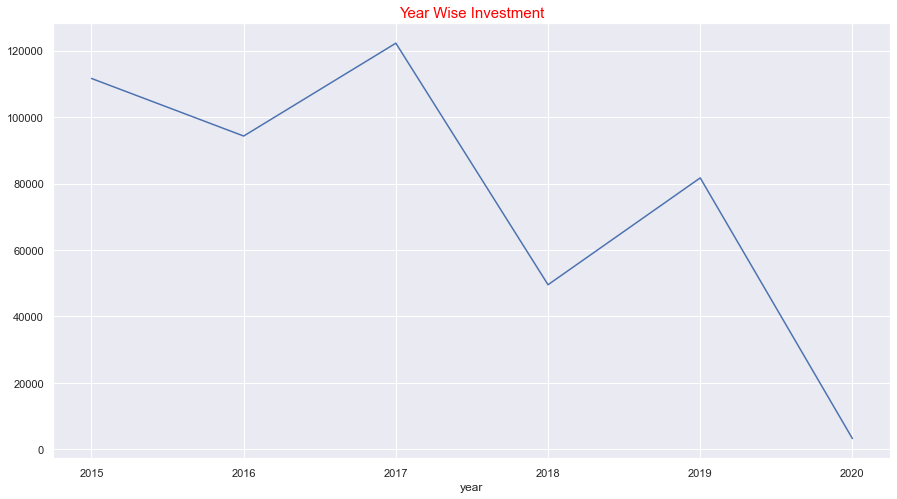

In [96]:
df_copy.groupby("year")["amount_cr"].sum().plot()
plt.gcf().set_size_inches(15, 8)
plt.title("Year Wise Investment",fontdict={"fontsize":15,"color":"red"})
plt.show()

# Summary :
# In 2017 we have highest investment around 13000 millions and as time goes the number of investment getting reduced to 100 millions in 2020.

In [97]:
df_copy["month"] = df_copy["date"].dt.month

In [98]:
df_copy[df_copy["year"] ==  2015].groupby("month").sum()["amount_cr"]

month
1     10958.855576
2      3150.264824
3      8753.388251
4      6248.111218
5      4020.837297
6      9125.549679
7     17072.234772
8     11039.348918
9     15986.689149
10     6618.595044
11    13135.158488
12     5540.793160
Name: amount_cr, dtype: float64

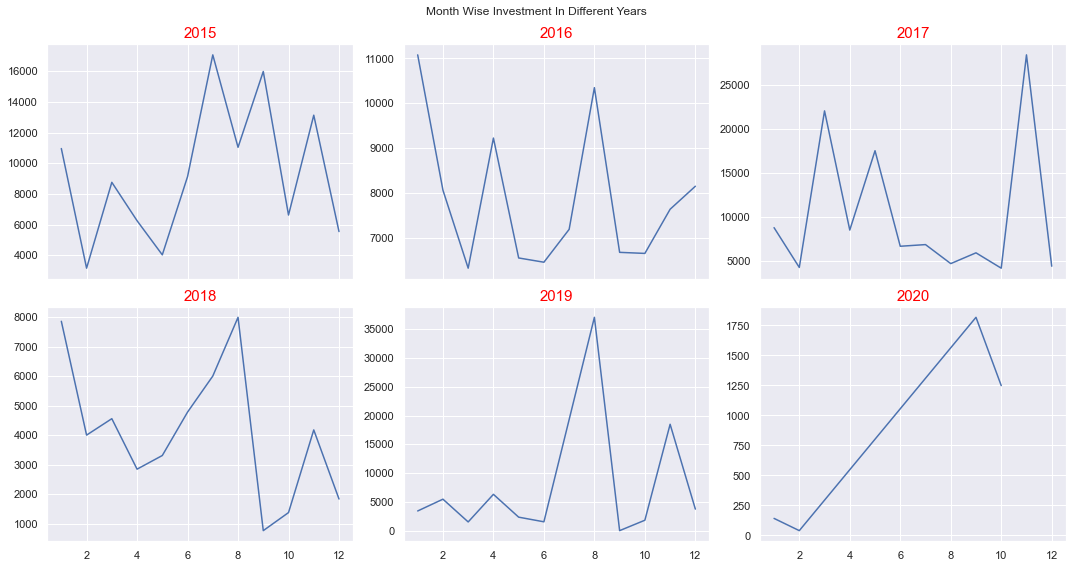

In [99]:
# Monthwise investment for every year.

fig,axes = plt.subplots(2,3,sharex=True)
years = df_copy["year"].unique()[::-1]
count = 0

plt.gcf().set_size_inches(15, 8)
fig.suptitle("Month Wise Investment In Different Years")


for i in range(0,2):
    for j in range(0,3):
        data = df_copy[df_copy["year"] ==  years[count]].groupby("month").sum()["amount_cr"].reset_index()
        axes[i,j].plot(data["month"],data["amount_cr"])
        axes[i,j].set_title(years[count],fontdict={"fontsize":15,"color":"red"})
        plt.tight_layout()
        count += 1
plt.show()

        
# Summary :
# Investors are investing more money in between june to august as per 2015, 2016, 2018, 2019 graph shows.
# In 2017 investor invested almost 30000 Cr between octomber to december.
# In 2020 year investment growth exponentially increased from 25 Cr to almost 1800 Cr in september month and suddenly goes down to 1250 Cr in octomber month.

In [100]:
# Consumer Internet
temp_df = df_copy[df_copy["industry_vertical"] == "Consumer Internet"]

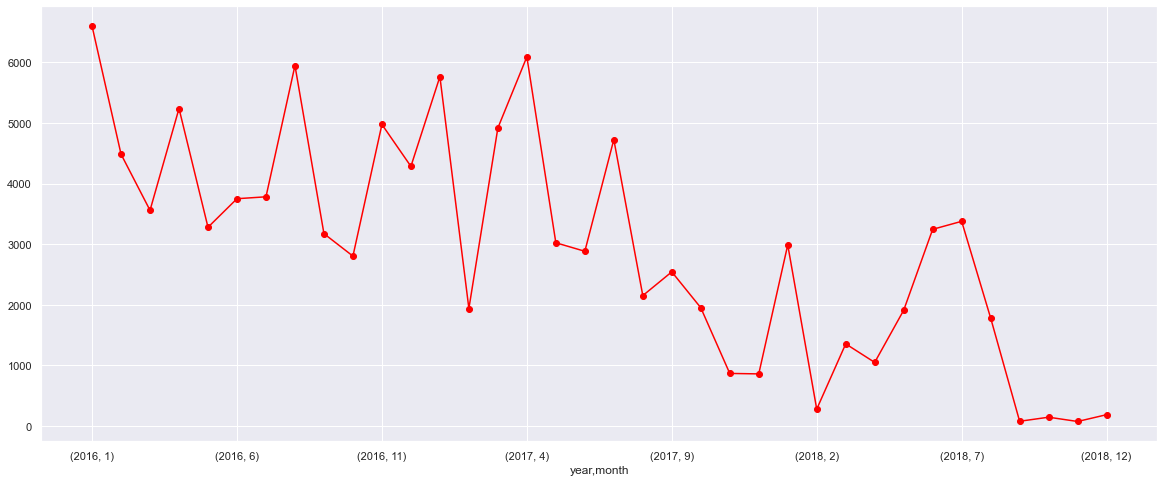

In [160]:
plt.figure(figsize=(20,8))
temp_df.groupby(["year","month"])["amount_cr"].sum().plot(c="red",marker="o")
# temp_df.groupby(["year","month"])["amount_cr"].sum().plot(c="red",marker="o")
plt.show()